In [34]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import copy

In [35]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train_image = copy.deepcopy(x_train)
x_train = x_train[:1000].reshape(1000, 28 * 28)
y_train = y_train[:1000]
weights = np.random.random((784,841))

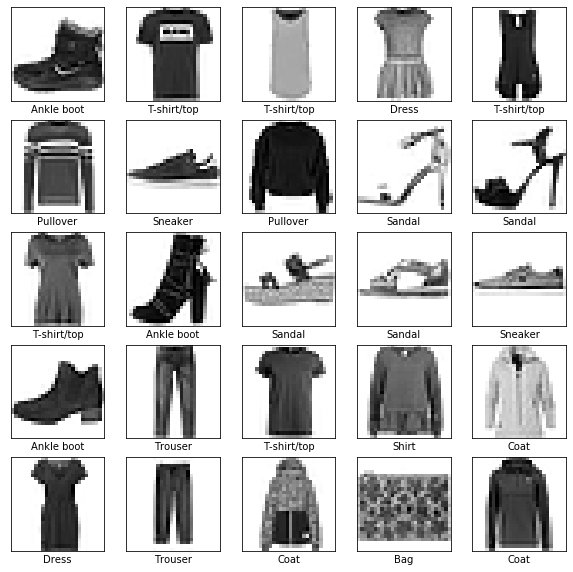

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [37]:
# Number of Neurons 841
m = 841

# Initial Weights:
print(weights)
print(weights.shape)

#initial learning rate
alpha = 0.6
decay_alpha = 0.5

# Initial neighbour radius
R = 0

# Normalize Input
x_train = x_train / 255.0
x_test = x_test / 255.0
x_test = x_test[:200].reshape(200, 28 * 28)
print(x_train)

[[0.57247225 0.72637476 0.42666237 ... 0.82786562 0.58324279 0.84912401]
 [0.03629901 0.17879683 0.22110487 ... 0.62348616 0.42568129 0.05019177]
 [0.64347856 0.84512305 0.94457004 ... 0.01706926 0.79609418 0.77393832]
 ...
 [0.42593301 0.00264159 0.6812021  ... 0.38837259 0.10400739 0.19792439]
 [0.17546647 0.41445037 0.35528318 ... 0.64928585 0.70871925 0.73535865]
 [0.50679313 0.70997484 0.75873691 ... 0.95341168 0.29429482 0.78126689]]
(784, 841)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
def compute_distance_square(j, weight, x):
    sum = 0
    w = np.array(weight).transpose()[j]
    for i in range(len(x)):
        sum = sum + np.square(w[i] - x[i])
                   
    return sum
    

In [ ]:
for _ in range(3):
    for i in range(len(x_train)):
        print("input number: ", i)
        d = []
        for j in range(m):
            d.append(compute_distance_square(j, weights, x_train[i]))
#         print(np.array(weights).transpose()[416])
        minpos = d.index(min(d))
        print(min(d))
#         print(minpos)
        for j in range(minpos - R, minpos + R + 1):
            print(j)
            print(y_train[i])
            weights[:, j] = weights[:, j] + alpha * (x_train[i] - weights[:, j])
            
        print()
    alpha = alpha * decay_alpha
        


input number:  0
179.8940514664926
556
9

input number:  1
161.70622718196802
556
0

input number:  2
102.46347370205848
556
0

input number:  3
22.462407347036223
556
3

input number:  4
63.200881420875035
556
0

input number:  5
104.37687730981003
556
2

input number:  6
139.36713407265714
556
7

input number:  7
188.46612816202318
556
2

input number:  8
201.47410678796874
108
5

input number:  9
95.44692011387923
108
5

input number:  10
110.94224192725272
556
0

input number:  11
110.53018931904649
556
9

input number:  12
92.29883806707788
108
5

input number:  13
40.08988415819393
108
5

input number:  14
34.69421022516485
108
7

input number:  15
119.35160026563725
108
9

input number:  16
91.88586089933405
556
1

input number:  17
50.73462974455592
556
0

input number:  18
76.56993420641463
556
6

input number:  19
74.54745239847607
108
4

input number:  20
75.5303774789646
556
3

input number:  21
55.16604168644501
556
1

input number:  22
43.535969134677586
556
4

input numb

54.73818991692643
108
4

input number:  189
100.76544415139092
556
7

input number:  190
69.0163053020907
108
3

input number:  191
44.14835336935016
108
0

input number:  192
89.85127328920697
556
5

input number:  193
125.96603247509995
556
8

input number:  194
101.77485831705044
556
4

input number:  195
80.37053928926015
108
1

input number:  196
23.057874798614517
108
1

input number:  197
121.80768729218215
254
2

input number:  198
88.59141293724274
556
9

input number:  199
67.60966035353073
254
2

input number:  200
86.53751846769778
108
8

input number:  201
72.86167730517737
556
5

input number:  202
47.53722918983363
108
0

input number:  203
32.63734055440845
254
6

input number:  204
37.41051314142931
254
3

input number:  205
38.72276189100773
254
4

input number:  206
59.908635761904726
254
6

input number:  207
14.941605735229391
108
0

input number:  208
73.09231190821203
556
9

input number:  209
73.08806237383938
108
1

input number:  210
68.24963638203127
556
7

i

36.06749636665565
108
3

input number:  375
63.117930717775835
108
3

input number:  376
86.21809774026855
254
9

input number:  377
57.14677496499729
108
0

input number:  378
37.64456806375444
108
3

input number:  379
57.65034324719953
108
1

input number:  380
147.58090877862236
254
6

input number:  381
75.05905337613676
254
4

input number:  382
25.13835692215766
556
7

input number:  383
65.24465883235489
108
0

input number:  384
43.0227283205015
556
5

input number:  385
48.98022835339685
108
1

input number:  386
46.37101239275528
556
5

input number:  387
71.12145316441408
254
4

input number:  388
54.71697203026159
108
4

input number:  389
35.79489789254187
556
5

input number:  390
65.37545122497852
556
9

input number:  391
62.43031472004696
108
1

input number:  392
58.58189500575407
254
0

input number:  393
52.696460690657084
556
5

input number:  394
88.54719369245058
556
8

input number:  395
47.62490516043247
254
3

input number:  396
60.00130310246671
556
4

input

60.020167786055694
254
6

input number:  561
57.91079925618629
638
5

input number:  562
115.8685106314294
556
9

input number:  563
63.292008171306534
556
9

input number:  564
81.15288960333359
254
0

input number:  565
38.23558756621629
254
0

input number:  566
123.41561489454384
254
2

input number:  567
54.41761409664296
108
4

input number:  568
86.41797873674234
108
3

input number:  569
32.87105478830495
638
7

input number:  570
45.272284690272755
556
9

input number:  571
50.5740353264046
108
3

input number:  572
79.5055148886679
254
1

input number:  573
58.84957749580385
556
9

input number:  574
31.972486221106003
108
2

input number:  575
46.045077293563565
556
7

input number:  576
65.54394880422093
638
5

input number:  577
36.929078140397685
638
5

input number:  578
56.726996541667376
254
4

input number:  579
58.19888325134823
254
8

input number:  580
44.70363714513004
254
2

input number:  581
83.36286828596653
638
7

input number:  582
33.402296211548936
638
8



51.12637605741957
556
9

input number:  747
104.59659366124076
638
8

input number:  748
29.848056821037794
108
6

input number:  749
98.80779265069077
108
2

input number:  750
55.205661835310906
638
8

input number:  751
95.6893021618459
638
1

input number:  752
59.675536486095375
108
4

input number:  753
71.11273850307525
638
1

input number:  754
16.95715494353345
638
1

input number:  755
31.363156054873535
108
2

input number:  756
70.50700681614161
638
3

input number:  757
76.67700068312077
638
3

input number:  758
86.87700769411879
108
8

input number:  759
51.90094195227904
556
9

input number:  760
76.95952373238818
638
5

input number:  761
103.64627399343387
638
1

input number:  762
48.13915901699581
638
6

input number:  763
47.481411689819865
638
4

input number:  764
73.9411231146273
638
5

input number:  765
68.28266173913691
556
9

input number:  766
90.44885027653284
108
6

input number:  767
84.50232994668319
108
2

input number:  768
88.27264431283449
254
8

in

93.94989180731494
254
9

input number:  933
32.784490694370966
108
4

input number:  934
38.48069719575476
108
2

input number:  935
96.85184039853611
254
5

input number:  936
74.1911675239688
254
5

input number:  937
52.772071549948684
254
7

input number:  938
77.21625520025341
108
4

input number:  939
54.42344413433947
108
2

input number:  940
60.875209393678745
108
6

input number:  941
148.16999659236868
254
9

input number:  942
43.66281262164696
556
0

input number:  943
71.04947820386705
254
5

input number:  944
47.48439081854647
108
3

input number:  945
41.82602241375802
556
6

input number:  946
74.46377932020445
254
9

input number:  947
68.94340836532986
556
5

input number:  948
37.611052550894286
638
3

input number:  949
63.643624147310284
108
6

input number:  950
58.67586806499079
556
0

input number:  951
25.655260453915947
638
3

input number:  952
68.96698648680885
254
5

input number:  953
18.304174106917305
254
7

input number:  954
62.44407446723371
638
1



65.84424647824018
556
5

input number:  121
33.30148727904257
556
5

input number:  122
56.139127932891995
254
9

input number:  123
33.455157380833086
638
2

input number:  124
75.04557307655156
108
2

input number:  125
93.38475630525437
108
2

input number:  126
26.140544382888613
556
7

input number:  127
42.8717194433148
638
6

input number:  128
62.51035586810505
108
4

input number:  129
56.74151098757809
638
1

input number:  130
47.64718478376783
556
8

input number:  131
41.710414613940365
556
7

input number:  132
19.738153303821477
556
7

input number:  133
54.2889170203507
556
5

input number:  134
41.780702873292356
638
4

input number:  135
60.96392693836781
108
2

input number:  136
54.82667748755936
254
9

input number:  137
24.72789778496257
638
1

input number:  138
23.45732133139936
556
7

input number:  139
44.65374494069713
108
4

input number:  140
39.66835429616705
108
6

input number:  141
41.9374701648895
556
9

input number:  142
30.634368159547943
556
7

inp

In [ ]:
print(weights)

In [ ]:
def set_key(dictionary, key, value):
         if key not in dictionary:
             dictionary[key] = value
         elif type(dictionary[key]) == list:
             dictionary[key].append(value)
         else:
             dictionary[key] = [dictionary[key], value]

In [ ]:
my_dict = {}
new = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
label_dict = dict.fromkeys(new, 0)
print(label_dict)

for i in range(len(x_train)):
    print("input number: ", i)
    d = []
    for j in range(m):
        d.append(compute_distance_square(j, weights, x_train[i]))
#         print(np.array(weights).transpose()[416])
    print(min(d))
    minpos = d.index(min(d))
    label_dict[y_train[i]] = 1 + label_dict[y_train[i]]
    my_dict[minpos] = label_dict
#     set_key(my_dict, minpos, label_dict)
    print(my_dict)
print(my_dict)

In [ ]:
R = 1
weights = np.random.random((784,841))

In [ ]:
R = 1
weights = np.random.random((784,841))

In [ ]:
for _ in range(5):
    for i in range(len(x_train)):
        print("input number: ", i)
        d = []
        for j in range(m):
            d.append(compute_distance_square(j, weights, x_train[i]))
#         print(np.array(weights).transpose()[416])
        minpos = d.index(min(d))
        print(min(d))
#         print(minpos)
        for j in range(minpos - R, minpos + R + 1):
            print(j)
            print(y_train[i])
            weights[:, j] = weights[:, j] + alpha * (x_train[i] - w)
            
        print()
    alpha = alpha * decay_alpha
        


In [19]:
for _ in range(10):
    for i in range(len(x_train)):
        print("input number: ", i)
        d = []
        for j in range(m):
            d.append(compute_distance_square(j, weights, x_train[i]))
#         print(np.array(weights).transpose()[416])
        minpos = d.index(min(d))
        print(min(d))
#         print(minpos)
        for j in range(minpos - R, minpos + R + 1):
            print(j)
            print(y_train[i])
            weights[:, j] = weights[:, j] + alpha * (x_train[i] - w)
            
        print()
    alpha = alpha * decay_alpha
        


input number:  0
179.1087580831811
592
9

input number:  1
161.14512578292505
592
0

input number:  2
101.36061197189011
592
0

input number:  3
22.069564968861595
592
3

input number:  4
63.13479271702171
592
0

input number:  5
104.31703346053362
592
2

input number:  6
139.39263675737706
592
7

input number:  7
188.4727954872332
592
2

input number:  8
202.3878526179144
592
5

input number:  9
88.29650612024636
592
5

input number:  10
132.43334548600973
592
0

input number:  11
110.0673491845655
592
9

input number:  12
130.2232562251763
592
5

input number:  13
55.523966505364086
592
5

input number:  14
36.99592542177837
592
7

input number:  15
115.28474943865969
592
9

input number:  16
134.44329894255588
592
1

input number:  17
76.42386046674507
592
0

input number:  18
76.58210605433072
592
6

input number:  19
76.8463113908578
592
4

input number:  20
85.23177907117466
592
3

input number:  21
44.36547873914377
592
1

input number:  22
44.074631178361614
592
4

input number

54.73818991692643
592
4

input number:  189
100.76544415139092
763
7

input number:  190
69.0163053020907
592
3

input number:  191
44.14835336935016
592
0

input number:  192
89.85127328920697
763
5

input number:  193
125.96603247509995
763
8

input number:  194
101.77485831705044
763
4

input number:  195
80.37053928926015
592
1

input number:  196
23.057874798614517
592
1

input number:  197
126.63561684409727
671
2

input number:  198
88.59141293724274
763
9

input number:  199
65.85840679356512
671
2

input number:  200
86.53751846769778
592
8

input number:  201
72.86167730517737
763
5

input number:  202
47.53722918983363
592
0

input number:  203
32.23927895683167
671
6

input number:  204
37.18296916597431
671
3

input number:  205
38.73238799240653
671
4

input number:  206
59.91845100350036
671
6

input number:  207
14.941605735229391
592
0

input number:  208
73.09231190821203
763
9

input number:  209
73.08806237383938
592
1

input number:  210
68.24963638203127
763
7

in

36.06749636665565
592
3

input number:  375
63.117930717775835
592
3

input number:  376
86.21809774026853
671
9

input number:  377
57.14677496499729
592
0

input number:  378
37.64456806375444
592
3

input number:  379
57.65034324719953
592
1

input number:  380
147.58090877862233
671
6

input number:  381
75.05905337613676
671
4

input number:  382
25.13835692215766
763
7

input number:  383
65.24465883235489
592
0

input number:  384
43.0227283205015
763
5

input number:  385
48.98022835339685
592
1

input number:  386
46.37101239275528
763
5

input number:  387
71.12145316441408
671
4

input number:  388
54.71697203026159
592
4

input number:  389
35.79489789254187
763
5

input number:  390
65.37545122497852
763
9

input number:  391
62.43031472004696
592
1

input number:  392
58.58189500575407
671
0

input number:  393
52.696460690657084
763
5

input number:  394
88.54719369245058
763
8

input number:  395
47.62490516043247
671
3

input number:  396
60.00130310246671
763
4

input

60.020167786055694
671
6

input number:  561
57.91079925618366
809
5

input number:  562
115.8685106314294
763
9

input number:  563
63.292008171306534
763
9

input number:  564
81.15288960333359
671
0

input number:  565
38.23558756621629
671
0

input number:  566
123.41561489454384
671
2

input number:  567
54.41761409664296
592
4

input number:  568
86.41797873674234
592
3

input number:  569
32.87105478830556
809
7

input number:  570
45.272284690272755
763
9

input number:  571
50.5740353264046
592
3

input number:  572
79.5055148886679
671
1

input number:  573
58.84957749580385
763
9

input number:  574
31.972486221106003
592
2

input number:  575
46.045077293563565
763
7

input number:  576
65.543948804221
809
5

input number:  577
36.92907814039762
809
5

input number:  578
56.726996541667376
671
4

input number:  579
58.19888325134823
671
8

input number:  580
44.70363714513004
671
2

input number:  581
83.36286828596648
809
7

input number:  582
33.402296211548915
809
8

inp

51.12637605741957
763
9

input number:  747
104.59659366124076
809
8

input number:  748
29.848056821037794
592
6

input number:  749
98.80779265069077
592
2

input number:  750
55.205661835310906
809
8

input number:  751
95.6893021618459
809
1

input number:  752
59.675536486095375
592
4

input number:  753
71.11273850307525
809
1

input number:  754
16.95715494353345
809
1

input number:  755
31.363156054873535
592
2

input number:  756
70.50700681614161
809
3

input number:  757
76.67700068312077
809
3

input number:  758
86.87700769411879
592
8

input number:  759
51.90094195227904
763
9

input number:  760
76.95952373238818
809
5

input number:  761
103.64627399343387
809
1

input number:  762
48.13915901699581
809
6

input number:  763
47.481411689819865
809
4

input number:  764
73.9411231146273
809
5

input number:  765
68.28266173913691
763
9

input number:  766
90.44885027653284
592
6

input number:  767
84.50232994668319
592
2

input number:  768
88.27264431283449
671
8

in

93.94989180731494
671
9

input number:  933
32.784490694370966
592
4

input number:  934
38.48069719575476
592
2

input number:  935
96.85184039853611
671
5

input number:  936
74.1911675239688
671
5

input number:  937
52.772071549948684
671
7

input number:  938
77.21625520025341
592
4

input number:  939
54.42344413433947
592
2

input number:  940
60.875209393678745
592
6

input number:  941
148.16999659236868
671
9

input number:  942
43.66281262164696
763
0

input number:  943
71.04947820386705
671
5

input number:  944
47.48439081854647
592
3

input number:  945
41.82602241375802
763
6

input number:  946
74.46377932020445
671
9

input number:  947
68.94340836532986
763
5

input number:  948
37.611052550894286
809
3

input number:  949
63.643624147310284
592
6

input number:  950
58.67586806499079
763
0

input number:  951
25.655260453915947
809
3

input number:  952
68.96698648680885
671
5

input number:  953
18.304174106917305
671
7

input number:  954
62.44407446723371
809
1



65.84424647824018
763
5

input number:  121
33.30148727904257
763
5

input number:  122
56.139127932891995
671
9

input number:  123
33.455157380833086
809
2

input number:  124
75.04557307655156
592
2

input number:  125
93.38475630525437
592
2

input number:  126
26.140544382888613
763
7

input number:  127
42.8717194433148
809
6

input number:  128
62.51035586810505
592
4

input number:  129
56.74151098757809
809
1

input number:  130
47.64718478376783
763
8

input number:  131
41.710414613940365
763
7

input number:  132
19.738153303821477
763
7

input number:  133
54.2889170203507
763
5

input number:  134
41.780702873292356
809
4

input number:  135
60.96392693836781
592
2

input number:  136
54.82667748755936
671
9

input number:  137
24.72789778496257
809
1

input number:  138
23.45732133139936
763
7

input number:  139
44.65374494069713
592
4

input number:  140
39.66835429616705
592
6

input number:  141
41.9374701648895
763
9

input number:  142
30.634368159547943
763
7

inp

23.323286631477046
592
6

input number:  307
32.36254587067688
809
1

input number:  308
38.76308444011366
809
1

input number:  309
33.5748143819621
592
6

input number:  310
79.54399190652995
763
7

input number:  311
47.5429821893883
592
4

input number:  312
63.83717243457948
592
4

input number:  313
66.21418530747069
809
8

input number:  314
57.015655349591995
592
6

input number:  315
44.93195967487182
809
4

input number:  316
97.82336082406927
592
6

input number:  317
67.70371407074455
763
9

input number:  318
63.231922647454795
592
3

input number:  319
31.33350944074849
763
7

input number:  320
39.29373928281821
763
5

input number:  321
38.48975991473655
809
0

input number:  322
66.50743770313964
671
8

input number:  323
25.30370751212775
809
3

input number:  324
44.46575259634036
809
4

input number:  325
65.63505128820167
809
0

input number:  326
68.90325991466318
809
3

input number:  327
49.01980573363417
809
3

input number:  328
60.44824063255905
592
2

input 

69.65182685877816
763
9

input number:  493
70.18537537665084
592
0

input number:  494
68.11541673613236
763
8

input number:  495
68.80578048184212
592
6

input number:  496
59.46299404036857
809
3

input number:  497
42.602487586682415
763
9

input number:  498
51.35601208981792
809
1

input number:  499
57.03033739222932
592
6

input number:  500
37.27281478687468
592
3

input number:  501
45.97089891895352
809
2

input number:  502
108.8479454071683
592
6

input number:  503
27.176707702681387
809
1

input number:  504
58.12298580575007
809
0

input number:  505
70.10973962327913
809
2

input number:  506
30.245593664197028
809
6

input number:  507
65.76239598929945
592
2

input number:  508
64.48249754944956
592
3

input number:  509
38.491727402408216
809
3

input number:  510
18.888785227949786
763
9

input number:  511
44.571916064114994
809
1

input number:  512
29.83364768865228
671
7

input number:  513
24.595173232342
763
9

input number:  514
36.57836671823889
809
1

inp

69.00790638472138
809
0

input number:  679
19.74463988465686
671
7

input number:  680
45.320097262033975
763
9

input number:  681
37.00429579992413
671
8

input number:  682
102.21015777134009
671
5

input number:  683
57.55013041296226
671
5

input number:  684
47.50699232604731
592
2

input number:  685
64.12509898041729
809
1

input number:  686
44.52974023444944
809
3

input number:  687
24.130852778009853
809
4

input number:  688
44.2458537319878
809
6

input number:  689
16.966984280607807
671
7

input number:  690
51.789896444423405
671
7

input number:  691
32.11160100757513
671
5

input number:  692
71.57866311444629
763
9

input number:  693
27.886409354492447
763
9

input number:  694
17.403797528010237
671
7

input number:  695
84.43546322350754
592
8

input number:  696
39.07208497248432
592
2

input number:  697
21.397864636555223
671
7

input number:  698
47.349450209043596
671
4

input number:  699
32.66545695306673
671
7

input number:  700
40.03183097800973
671
0


36.01082187357676
809
1

input number:  865
48.033655217400714
809
1

input number:  866
55.059955154667456
763
9

input number:  867
30.511979226146092
763
9

input number:  868
48.571390738895545
809
3

input number:  869
51.33548440652102
763
9

input number:  870
50.236126431362344
671
7

input number:  871
45.74011417767294
809
3

input number:  872
74.4246413543923
592
1

input number:  873
58.73609822342237
763
9

input number:  874
28.903161353031933
809
1

input number:  875
14.993205492360838
809
6

input number:  876
28.2041323419704
809
3

input number:  877
69.59835639514601
592
0

input number:  878
38.323619677000096
592
4

input number:  879
110.7794072615109
671
8

input number:  880
45.902000439902245
592
0

input number:  881
32.63403990288007
592
6

input number:  882
29.153925526544477
592
6

input number:  883
56.09290957256589
592
2

input number:  884
35.12699982656839
763
9

input number:  885
38.79783259634976
809
1

input number:  886
43.20923522426312
763
9


25.773267431608616
809
3

input number:  52
33.325377850836716
763
7

input number:  53
38.72482376794069
592
2

input number:  54
28.42606925450223
763
2

input number:  55
44.24340571026094
809
6

input number:  56
63.90297469284684
809
6

input number:  57
58.602408772960544
809
8

input number:  58
36.09482102647224
809
3

input number:  59
49.23615930751992
809
3

input number:  60
89.32921350093014
671
5

input number:  61
50.93491876623285
809
0

input number:  62
29.179295941757008
763
5

input number:  63
32.20169824309856
763
5

input number:  64
66.99845942173424
809
0

input number:  65
22.216596882822245
592
2

input number:  66
46.234447652590504
809
0

input number:  67
41.95710181028024
809
0

input number:  68
47.40223405186627
592
4

input number:  69
61.13633120590928
809
1

input number:  70
82.16834437429553
592
3

input number:  71
37.19835764900252
809
1

input number:  72
27.159176371074764
809
6

input number:  73
42.7531356374466
809
3

input number:  74
34.87

37.72443166867385
592
4

input number:  239
45.08068446808082
809
4

input number:  240
30.225515686592257
592
4

input number:  241
46.6118256521839
592
4

input number:  242
28.696533692723946
592
4

input number:  243
43.117114354333744
809
1

input number:  244
41.984566908506025
763
5

input number:  245
54.28556009294106
809
6

input number:  246
72.71056446907807
671
5

input number:  247
65.49084413931637
763
3

input number:  248
38.299502351710736
809
3

input number:  249
51.559347032548445
763
7

input number:  250
58.128589982375125
763
3

input number:  251
41.70508381140734
763
3

input number:  252
48.61699255183436
763
6

input number:  253
36.90255657612927
592
2

input number:  254
81.94212566238095
671
8

input number:  255
26.50695645860779
592
4

input number:  256
22.272221575199577
763
6

input number:  257
37.79600157174011
763
5

input number:  258
56.63670550626445
763
9

input number:  259
58.854785127738495
809
3

input number:  260
42.31949387433035
592
2


63.141518703485794
671
9

input number:  425
29.914686230397855
763
7

input number:  426
28.008855058178604
592
4

input number:  427
52.60754830084788
809
1

input number:  428
46.05079705758996
763
2

input number:  429
41.83226618523333
763
0

input number:  430
71.1157485983206
671
8

input number:  431
56.84828018780346
671
9

input number:  432
28.18528246999269
809
1

input number:  433
25.4434855103818
809
4

input number:  434
34.75547069977747
671
9

input number:  435
41.25817491343614
763
5

input number:  436
61.85134826367558
763
6

input number:  437
34.519105301846515
763
7

input number:  438
40.106653289684786
809
0

input number:  439
42.1414259839689
809
3

input number:  440
50.13133615817842
671
2

input number:  441
42.425633649452784
809
0

input number:  442
19.375323171884133
592
4

input number:  443
30.427019126059108
809
1

input number:  444
46.36101847056823
809
0

input number:  445
20.630227322486565
809
0

input number:  446
66.65740256187182
671
8

i

102.62195681872564
671
8

input number:  611
50.099350062074
671
8

input number:  612
50.40532785975818
592
4

input number:  613
95.72269218716009
671
8

input number:  614
26.857818544020446
763
5

input number:  615
31.49361346936466
592
4

input number:  616
40.590170674342474
592
2

input number:  617
83.34945202187251
592
2

input number:  618
38.1595718136456
763
7

input number:  619
32.34142716385925
763
7

input number:  620
34.12825324654117
763
5

input number:  621
31.189116444482284
763
8

input number:  622
32.434638421272716
592
4

input number:  623
22.60902531235989
592
6

input number:  624
51.71010313449384
671
9

input number:  625
41.011553456256806
592
4

input number:  626
30.737472061519185
809
3

input number:  627
25.031070357318953
763
7

input number:  628
55.98509805910852
809
8

input number:  629
24.262550081918274
763
7

input number:  630
86.88057618624472
592
8

input number:  631
36.442901436041346
809
3

input number:  632
20.263094270780964
763
7


20.14826630015451
809
1

input number:  797
32.011744138899026
592
6

input number:  798
35.87460925945081
763
7

input number:  799
20.732604283661498
809
1

input number:  800
54.609351370602084
671
9

input number:  801
53.6950882288766
809
8

input number:  802
20.34473311424447
809
3

input number:  803
65.57164476420533
671
5

input number:  804
15.540392751842088
763
7

input number:  805
29.321567230434223
809
1

input number:  806
21.06727955421844
809
1

input number:  807
29.04584305496864
671
9

input number:  808
24.830497368275413
809
0

input number:  809
37.81076262730878
763
6

input number:  810
54.300328536946544
592
4

input number:  811
91.28008532256487
671
8

input number:  812
68.01618934566062
592
0

input number:  813
22.252991496276245
763
9

input number:  814
26.6921806197861
763
5

input number:  815
57.141776462776605
592
0

input number:  816
29.362917582459232
592
0

input number:  817
29.477150594793176
809
1

input number:  818
59.688527037862194
671


29.75998872552365
592
2

input number:  982
59.13906310839341
592
6

input number:  983
17.807905726742835
763
7

input number:  984
54.087122177245874
671
8

input number:  985
36.86355510254262
592
2

input number:  986
16.123270177907497
763
5

input number:  987
77.35489198458716
763
6

input number:  988
44.49748138107583
809
0

input number:  989
37.59736852334966
763
2

input number:  990
56.24895544302362
671
9

input number:  991
71.39513909685441
671
8

input number:  992
64.24647389669484
763
5

input number:  993
56.626564490464126
809
4

input number:  994
29.68393716020473
763
5

input number:  995
29.29649630223638
763
7

input number:  996
71.90009204153075
809
3

input number:  997
38.79460565246585
763
3

input number:  998
39.536857444410956
671
9

input number:  999
53.51120155025011
671
8

input number:  0
43.59202961170434
671
9

input number:  1
73.84215957080143
809
0

input number:  2
32.97591119027433
763
0

input number:  3
30.820152150315437
809
3

input num

42.13400753109675
592
0

input number:  170
26.804281640676606
809
1

input number:  171
58.753201539302125
592
0

input number:  172
80.5159994375215
763
5

input number:  173
54.02443999535671
763
5

input number:  174
24.05354594203418
809
1

input number:  175
35.00561470967922
763
7

input number:  176
52.93178761671073
592
0

input number:  177
40.653645770078164
763
5

input number:  178
58.61533028516878
671
8

input number:  179
33.83556264673327
592
4

input number:  180
38.362497724594
809
0

input number:  181
42.89388788883736
592
4

input number:  182
31.419444155393347
763
0

input number:  183
36.505098393369536
763
6

input number:  184
59.8884041868923
592
6

input number:  185
64.79702049491068
592
4

input number:  186
31.131847273935453
809
0

input number:  187
37.28144501980866
763
0

input number:  188
32.36055355951287
592
4

input number:  189
34.973445977094386
763
7

input number:  190
53.1658516789217
809
3

input number:  191
51.649531739021654
809
0

inpu

42.46877852917418
763
7

input number:  356
59.70927602561422
763
8

input number:  357
37.716452370746524
763
7

input number:  358
45.97408407102559
671
8

input number:  359
50.9171294334408
809
1

input number:  360
53.25964950564172
763
9

input number:  361
58.71296666021231
592
6

input number:  362
47.06964702894873
809
4

input number:  363
48.116109658587206
763
5

input number:  364
20.045566032534445
763
7

input number:  365
42.474200854985156
809
1

input number:  366
14.91245481923513
763
7

input number:  367
39.13166004180774
763
6

input number:  368
18.711182471736393
592
6

input number:  369
29.63542843969098
763
7

input number:  370
45.67480158840051
809
3

input number:  371
64.27263313021679
763
5

input number:  372
67.77316002948768
671
8

input number:  373
32.909982696896215
763
7

input number:  374
40.862393731696294
809
3

input number:  375
49.935119262941534
809
3

input number:  376
46.530425453017294
671
9

input number:  377
21.708986815568917
809
0

34.7592863320216
592
4

input number:  542
24.00149621088227
809
1

input number:  543
36.61774528823331
592
6

input number:  544
52.475243219936765
592
2

input number:  545
23.662318210243335
592
2

input number:  546
43.44223325680869
592
2

input number:  547
23.332458561126074
763
7

input number:  548
29.282151340890163
763
7

input number:  549
58.360928559503286
592
6

input number:  550
51.12298584709983
809
3

input number:  551
40.16472487087908
763
7

input number:  552
30.38522600752187
763
5

input number:  553
62.260028734731065
671
8

input number:  554
40.01468595621779
763
6

input number:  555
50.75210706395169
592
4

input number:  556
100.67547671199513
671
8

input number:  557
33.439965950313876
592
4

input number:  558
32.53701531833131
763
7

input number:  559
84.14934868111499
671
8

input number:  560
46.747661470462596
763
6

input number:  561
43.32180734252165
763
5

input number:  562
74.63659797766248
671
9

input number:  563
32.605490556285616
671
9

53.38258037400282
763
7

input number:  728
51.78770397403502
763
7

input number:  729
42.252063487556434
763
7

input number:  730
42.83176587105799
809
1

input number:  731
27.30916660074017
592
4

input number:  732
93.40071553395124
592
0

input number:  733
41.436581191364496
592
4

input number:  734
32.64472329554021
763
5

input number:  735
75.57318387979029
592
8

input number:  736
81.52698936515786
592
8

input number:  737
31.339207841185797
592
6

input number:  738
30.36507680148469
763
5

input number:  739
21.37236888329475
763
7

input number:  740
23.36132356612112
809
1

input number:  741
69.66270114029903
592
0

input number:  742
23.568274065433958
592
2

input number:  743
26.39281637803061
592
4

input number:  744
33.72142584186074
671
9

input number:  745
57.600651094242856
809
0

input number:  746
49.63223588343961
671
9

input number:  747
70.49876644050349
592
8

input number:  748
39.86903007990081
592
6

input number:  749
76.07003182455348
592
2

in

44.34236937160428
592
4

input number:  913
36.90615140501121
671
7

input number:  914
49.72694877474718
763
5

input number:  915
44.41415471335101
763
2

input number:  916
33.180861853519254
763
5

input number:  917
31.48274276827391
809
1

input number:  918
29.46770967679637
809
1

input number:  919
43.210905210460844
763
5

input number:  920
30.708491196733863
763
7

input number:  921
35.00278373568495
763
5

input number:  922
31.95773664600044
809
1

input number:  923
31.428519939216404
592
4

input number:  924
28.271318827673838
671
9

input number:  925
17.676135490634103
592
6

input number:  926
15.474327133628298
763
7

input number:  927
74.08826299007416
763
5

input number:  928
38.39336606454501
763
7

input number:  929
27.31800438374739
809
3

input number:  930
60.112515487341085
671
8

input number:  931
73.8859306766942
809
2

input number:  932
38.212029912158265
671
9

input number:  933
37.96581030322584
592
4

input number:  934
28.250068545644414
592
2

103.94063947358669
592
8

input number:  101
76.45844112958132
809
0

input number:  102
41.36718342607744
809
1

input number:  103
44.589940929420194
809
1

input number:  104
44.97004708853064
763
6

input number:  105
80.30100254976519
671
8

input number:  106
29.732854593333634
809
1

input number:  107
33.789342363030315
671
9

input number:  108
51.59701807934764
763
7

input number:  109
92.22216250639067
671
8

input number:  110
73.74770948863207
671
8

input number:  111
38.066443828522665
763
9

input number:  112
18.302283164118684
592
6

input number:  113
19.405585733348065
809
6

input number:  114
21.027889007110243
809
3

input number:  115
34.100896707410605
809
1

input number:  116
78.84942565579398
763
5

input number:  117
42.13988302147409
592
4

input number:  118
37.21025288454337
763
6

input number:  119
50.34484921554319
763
7

input number:  120
28.74251167375316
763
5

input number:  121
29.721190991960594
763
5

input number:  122
38.08686466700452
671


37.4970507418808
809
1

input number:  286
21.934483772667996
809
1

input number:  287
51.861934437944846
809
8

input number:  288
20.418224957454058
763
7

input number:  289
88.76902296953469
592
8

input number:  290
38.10744321706126
592
4

input number:  291
44.461111498883895
763
2

input number:  292
47.37083278919167
763
6

input number:  293
24.226214878497842
763
6

input number:  294
18.03552200659347
763
7

input number:  295
45.283418440531804
671
9

input number:  296
25.466253088719114
763
4

input number:  297
25.06485523109302
592
6

input number:  298
32.41888722499794
809
1

input number:  299
70.266112319435
671
9

input number:  300
28.85602417254198
763
5

input number:  301
49.80760671010303
592
6

input number:  302
42.98895110133249
809
0

input number:  303
33.191088395374926
763
5

input number:  304
67.27139406569921
592
0

input number:  305
41.42909031922516
809
1

input number:  306
22.34427517385203
592
6

input number:  307
25.194056380582285
809
1

i

24.366053983980578
809
6

input number:  471
21.475765357152277
809
3

input number:  472
35.20314788031949
763
7

input number:  473
37.079000118996554
592
4

input number:  474
43.62959610171088
671
9

input number:  475
35.06015892970808
763
5

input number:  476
76.27107953816049
671
8

input number:  477
61.28980320630639
671
9

input number:  478
36.88328461190412
763
3

input number:  479
34.75223266104303
763
9

input number:  480
26.86982526908002
592
6

input number:  481
53.2462884737255
592
4

input number:  482
23.541425499660637
763
7

input number:  483
41.591998241700274
592
2

input number:  484
34.692064051300605
809
2

input number:  485
40.47193097091196
763
6

input number:  486
29.244417331421882
592
4

input number:  487
38.53537194982253
763
8

input number:  488
63.95042490450477
809
3

input number:  489
25.53883599329925
809
0

input number:  490
46.68573147134698
592
2

input number:  491
84.53049146471787
671
8

input number:  492
51.951591404850774
671
9



32.00609126744789
809
4

input number:  657
20.572372350446106
763
5

input number:  658
39.401866082672456
592
4

input number:  659
72.45816557485804
671
9

input number:  660
81.5090991829055
671
8

input number:  661
57.45908877091657
592
8

input number:  662
31.220445077179804
809
0

input number:  663
41.20271099014999
671
9

input number:  664
45.58018769726273
592
2

input number:  665
76.03947298471142
592
0

input number:  666
7.820134249917112
763
7

input number:  667
47.01464423095634
809
3

input number:  668
30.567529457347295
763
7

input number:  669
58.04980732934624
671
9

input number:  670
32.48240545401422
809
3

input number:  671
96.0494713272015
592
8

input number:  672
41.30687905534175
592
4

input number:  673
49.68289192054487
809
3

input number:  674
28.81449251538233
763
7

input number:  675
97.2959143001425
592
8

input number:  676
24.242859359403685
809
1

input number:  677
61.7110333154406
592
4

input number:  678
52.14176514272086
809
0

input 

38.00881644509976
809
3

input number:  842
58.85759342419068
592
4

input number:  843
28.119626359396428
763
5

input number:  844
37.65527930081681
671
9

input number:  845
26.845573608512034
763
5

input number:  846
91.38794249136032
592
2

input number:  847
42.46378544366109
763
8

input number:  848
16.13054038309341
763
7

input number:  849
33.059595013801896
809
0

input number:  850
35.21507101401867
763
1

input number:  851
41.865133987900634
592
4

input number:  852
39.83163713627018
809
1

input number:  853
77.2106085593412
671
8

input number:  854
30.882090155850754
809
3

input number:  855
42.60772917587546
809
2

input number:  856
37.33250008140683
763
7

input number:  857
45.29121359934037
763
5

input number:  858
26.894952199611517
809
0

input number:  859
59.21588765485401
671
9

input number:  860
54.30658840166002
763
6

input number:  861
34.17053900949807
592
6

input number:  862
33.28701175399995
763
9

input number:  863
42.99148845806041
809
3

in

In [21]:
print(weights)

[[0.21063985 0.68839525 0.55415223 ... 0.73334802 0.76279128 0.40677762]
 [0.12207581 0.33966381 0.95027015 ... 0.53352135 0.24876961 0.20213545]
 [0.12560372 0.61807781 0.40757691 ... 0.42308536 0.80673603 0.64204267]
 ...
 [0.9806031  0.05733822 0.78488433 ... 0.36402632 0.93732109 0.04038886]
 [0.8071457  0.83052092 0.32441166 ... 0.89715038 0.85310938 0.06595529]
 [0.26705491 0.59100644 0.03104162 ... 0.40067846 0.74633326 0.28687983]]


In [22]:
R = 1
weights = np.random.random((784,841))

In [23]:
for _ in range(5):
    for i in range(len(x_train)):
        print("input number: ", i)
        d = []
        for j in range(m):
            d.append(compute_distance_square(j, weights, x_train[i]))
#         print(np.array(weights).transpose()[416])
        minpos = d.index(min(d))
        print(min(d))
#         print(minpos)
        for j in range(minpos - R, minpos + R + 1):
            print(j)
            print(y_train[i])
            weights[:, j] = weights[:, j] + alpha * (x_train[i] - w)
            
        print()
    alpha = alpha * decay_alpha
        


input number:  0
179.8993183050437
269
9


NameError: name 'w' is not defined

In [ ]:
for _ in range(10):
    for i in range(len(x_train)):
        print("input number: ", i)
        d = []
        for j in range(m):
            d.append(compute_distance_square(j, weights, x_train[i]))
#         print(np.array(weights).transpose()[416])
        minpos = d.index(min(d))
        print(min(d))
#         print(minpos)
        for j in range(minpos - R, minpos + R + 1):
            print(j)
            print(y_train[i])
            weights[:, j] = weights[:, j] + alpha * (x_train[i] - w)
            
        print()
    alpha = alpha * decay_alpha
        
